# Iterative Construction of a Penalised Vine Structure
This notebook iteratively estimate the quantile.

#### Libraries

In [1]:
import openturns as ot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

random_state = 123
np.random.seed(random_state)

#### Model function
This example consider the simple additive example.

In [2]:
from dependence.tests import func_overflow, margins_overflow, var_names_overflow, func_sum

test_func = func_overflow

#### Dimension and margins
We first define the problem dimension and the margins

In [3]:
margins = margins_overflow
dim = len(margins)

We chose the coefficients of the variables throught the additive function.

## Estimations
We create an instance of the main class for conservative estimate, and we define a q_func object for the quantile as a quantity of interest

In [4]:
from dependence import ConservativeEstimate, quantile_func

alpha = 0.95

if alpha > 0.5: # Maximizing the quantile
    def q_func(x, axis=1):
        return - quantile_func(alpha)(x, axis=axis)
else: # Minimizing
    q_func = quantile_func(alpha)

In [15]:
from dependence.utils import get_grid_sample, to_copula_params
from dependence.dependence_plot import plot_variation, compute_influence
K = 8
n = 10000

copulas = {'Normal': [1, 1],
           'Clayton': [13, 33],
           'Gumbel': [4, 24],
           'Joe': [6, 26]}

families = np.zeros((dim, dim))
quant_estimate = ConservativeEstimate(model_func=test_func, margins=margins, families=families)
kendalls, output_samples = compute_influence(quant_estimate, K, n, copulas, pair=[1, 0])

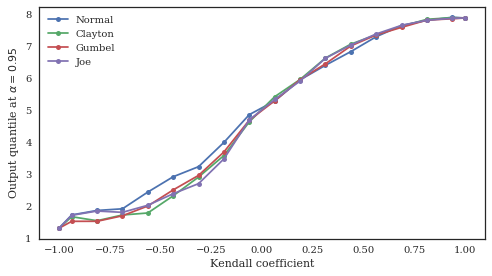

In [16]:
ylabel = 'Output quantile at $\\alpha=%.2f$' % (alpha)
plot_variation(output_samples, kendalls, q_func, ylabel=ylabel)